UPDATE CONCLUSIONS [ 7/8/24 ]
1. Atribut TIPE KEAHLIAN = 100 [decision tree & random forest]
2. Atribut LEVEL KEAHLIANN =  62 [random forest]
3. Atribut JABATAN = 50 [decision tree + RandomOverSampling]

# Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
import xgboost
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score


# Data Explorations

In [3]:
df= pd.read_csv(r"C:\Users\Lenovo\analyst_pkl\data\combBiodata.csv", sep=';')
df.head(5)

,NAMA,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,NIK,STATUS,LAMA_KERJA,DIVISI,KUALIFIKASI,GOL,LOKASI,TIPE KEAHLIAN,KELAS KEAHLIAN,LEVEL KEAHLIAN,KELAS JABATAN,JABATAN
0,Achmad Fauzi,0.0,2.0,2602.0,350000,Kontrak,3,DSO,S1,B1,Jakarta,Perekayasa,6,Perekayasa Madya,2,STAF LV. 3
1,Adi Pratama,7.0,6.0,8064.0,"8502,013",Tetap,16,DSO,S1,C3,Malang,Perekayasa,2,Pimpinan Muda,1,MANAGER
2,Adinda Azzahra,NaN,NaN,NaN,"9112,046",Tetap,16,DAK,S1,B3,Jakarta,Pelaksana,3,Pelaksana Utama,4,STAF LV. 3
3,Afrilia Fajarwati,NaN,NaN,NaN,221001,Kontrak,1,DAK,S1,B1-MI,Malang,Pelaksana,2,Pelaksana Pemula,2,STAF LV.0
4,Afrizal Aditya,29.0,3.0,56.0,"9301,057",Tetap,9,DIP,S1,B3,Malang,Perekayasa,2,Pimpinan Pemula,7,STAF LV. 3 / ASS. SUPERVISOR


In [4]:
df.shape

(63, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NAMA                  63 non-null     object 
 1   DURATIONS_PERPROJECT  40 non-null     float64
 2   TOTAL_PROJECT         40 non-null     float64
 3   TOTAL_TIME            40 non-null     float64
 4   NIK                   63 non-null     object 
 5   STATUS                63 non-null     object 
 6   LAMA_KERJA            63 non-null     int64  
 7   DIVISI                63 non-null     object 
 8   KUALIFIKASI           63 non-null     object 
 9   GOL                   63 non-null     object 
 10  LOKASI                63 non-null     object 
 11  TIPE KEAHLIAN         63 non-null     object 
 12  KELAS KEAHLIAN        63 non-null     int64  
 13  LEVEL KEAHLIAN        63 non-null     object 
 14  KELAS JABATAN         63 non-null     int64  
 15  JABATAN               63 

# Data Quality Check

In [10]:
df.nunique()

NAMA                    63
DURATIONS_PERPROJECT    19
TOTAL_PROJECT           22
TOTAL_TIME              39
NIK                     63
STATUS                   2
LAMA_KERJA              14
DIVISI                   6
KUALIFIKASI              1
GOL                     17
LOKASI                   3
TIPE KEAHLIAN            2
KELAS KEAHLIAN           7
LEVEL KEAHLIAN          13
KELAS JABATAN            7
JABATAN                 10
dtype: int64

In [11]:
df.isnull().sum()

NAMA                     0
DURATIONS_PERPROJECT    23
TOTAL_PROJECT           23
TOTAL_TIME              23
NIK                      0
STATUS                   0
LAMA_KERJA               0
DIVISI                   0
KUALIFIKASI              0
GOL                      0
LOKASI                   0
TIPE KEAHLIAN            0
KELAS KEAHLIAN           0
LEVEL KEAHLIAN           0
KELAS JABATAN            0
JABATAN                  0
dtype: int64

In [12]:
df.duplicated().sum()

0

# Null Values & Columns Combination

In [13]:
#since that the data needed is only from PPDB, so we can just drop the non-ppdb (the null values)
df1= df.dropna()
df1.isnull().sum()

NAMA                    0
DURATIONS_PERPROJECT    0
TOTAL_PROJECT           0
TOTAL_TIME              0
NIK                     0
STATUS                  0
LAMA_KERJA              0
DIVISI                  0
KUALIFIKASI             0
GOL                     0
LOKASI                  0
TIPE KEAHLIAN           0
KELAS KEAHLIAN          0
LEVEL KEAHLIAN          0
KELAS JABATAN           0
JABATAN                 0
dtype: int64

In [14]:
df1.nunique()

NAMA                    40
DURATIONS_PERPROJECT    19
TOTAL_PROJECT           22
TOTAL_TIME              39
NIK                     40
STATUS                   2
LAMA_KERJA              12
DIVISI                   6
KUALIFIKASI              1
GOL                     12
LOKASI                   3
TIPE KEAHLIAN            2
KELAS KEAHLIAN           7
LEVEL KEAHLIAN          11
KELAS JABATAN            7
JABATAN                  8
dtype: int64

In [15]:
#combining Kelas Keahlian and Level Keahlian into 1 column
#df1['KELAS_KEAHLIAN'] = df1['KELAS KEAHLIAN'].astype(str) + '_ ' + df1['LEVEL KEAHLIAN']
#df1=df1.drop(['KELAS KEAHLIAN', 'LEVEL KEAHLIAN'], axis=1)
#df1.head()


In [16]:
#combining Kelas Jabatan and Jabatan into 1 column
#df1['KELAS_JABATAN'] = df1['KELAS JABATAN'].astype(str) + '_ ' + df1['JABATAN']
#df1=df1.drop(['KELAS JABATAN', 'JABATAN', 'NIK'], axis=1)
#df1.head()

## Data Corr & Visualization

In [17]:
df1.head()

,NAMA,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,NIK,STATUS,LAMA_KERJA,DIVISI,KUALIFIKASI,GOL,LOKASI,TIPE KEAHLIAN,KELAS KEAHLIAN,LEVEL KEAHLIAN,KELAS JABATAN,JABATAN
0,Achmad Fauzi,0.0,2.0,2602.0,350000,Kontrak,3,DSO,S1,B1,Jakarta,Perekayasa,6,Perekayasa Madya,2,STAF LV. 3
1,Adi Pratama,7.0,6.0,8064.0,"8502,013",Tetap,16,DSO,S1,C3,Malang,Perekayasa,2,Pimpinan Muda,1,MANAGER
4,Afrizal Aditya,29.0,3.0,56.0,"9301,057",Tetap,9,DIP,S1,B3,Malang,Perekayasa,2,Pimpinan Pemula,7,STAF LV. 3 / ASS. SUPERVISOR
5,Ahmad Azhar Mashuri,0.0,51.0,3734.0,"8310,019",Tetap,16,DIP,S1,C3,Malang,Perekayasa,2,Pimpinan Muda,5,MANAGER
6,Ahmad Nashruddin,1066.0,11.0,14329.0,190101,Tetap,7,DSO,S1,B3-MI,Malang Madani,Perekayasa,3,Perekayasa Utama,5,STAF LV. 3 / ASS. SUPERVISOR


<Axes: >

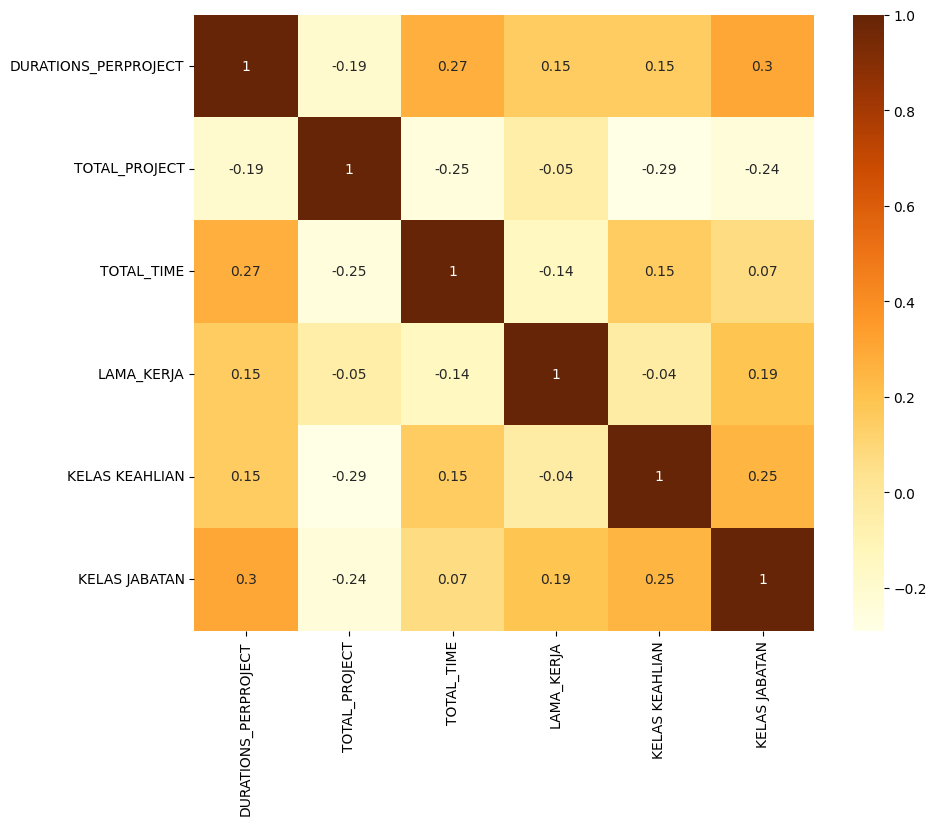

In [21]:
#seperating numerical from categorical data
df1n= df1[['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'TOTAL_TIME', 'LAMA_KERJA', 'KELAS KEAHLIAN', 'KELAS JABATAN']]
#correlation on numerical data
correl = df1n.corr().round(2)
plt.figure(figsize = (10,8))
sns.heatmap(correl, annot = True, cmap = 'YlOrBr')

based on the correlation of numerical above, i guess we better drop the total time cause it's the same as total project and durations.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27028\3714407753.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NAMA', palette='Set2', data=df1c)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27028\3714407753.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STATUS', palette='Set2', data=df1c)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27028\3714407753.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DIVISI', palette='Set2', data=df1c)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27028\3714407753.py:12: FutureWarning:

<Axes: xlabel='JABATAN', ylabel='count'>

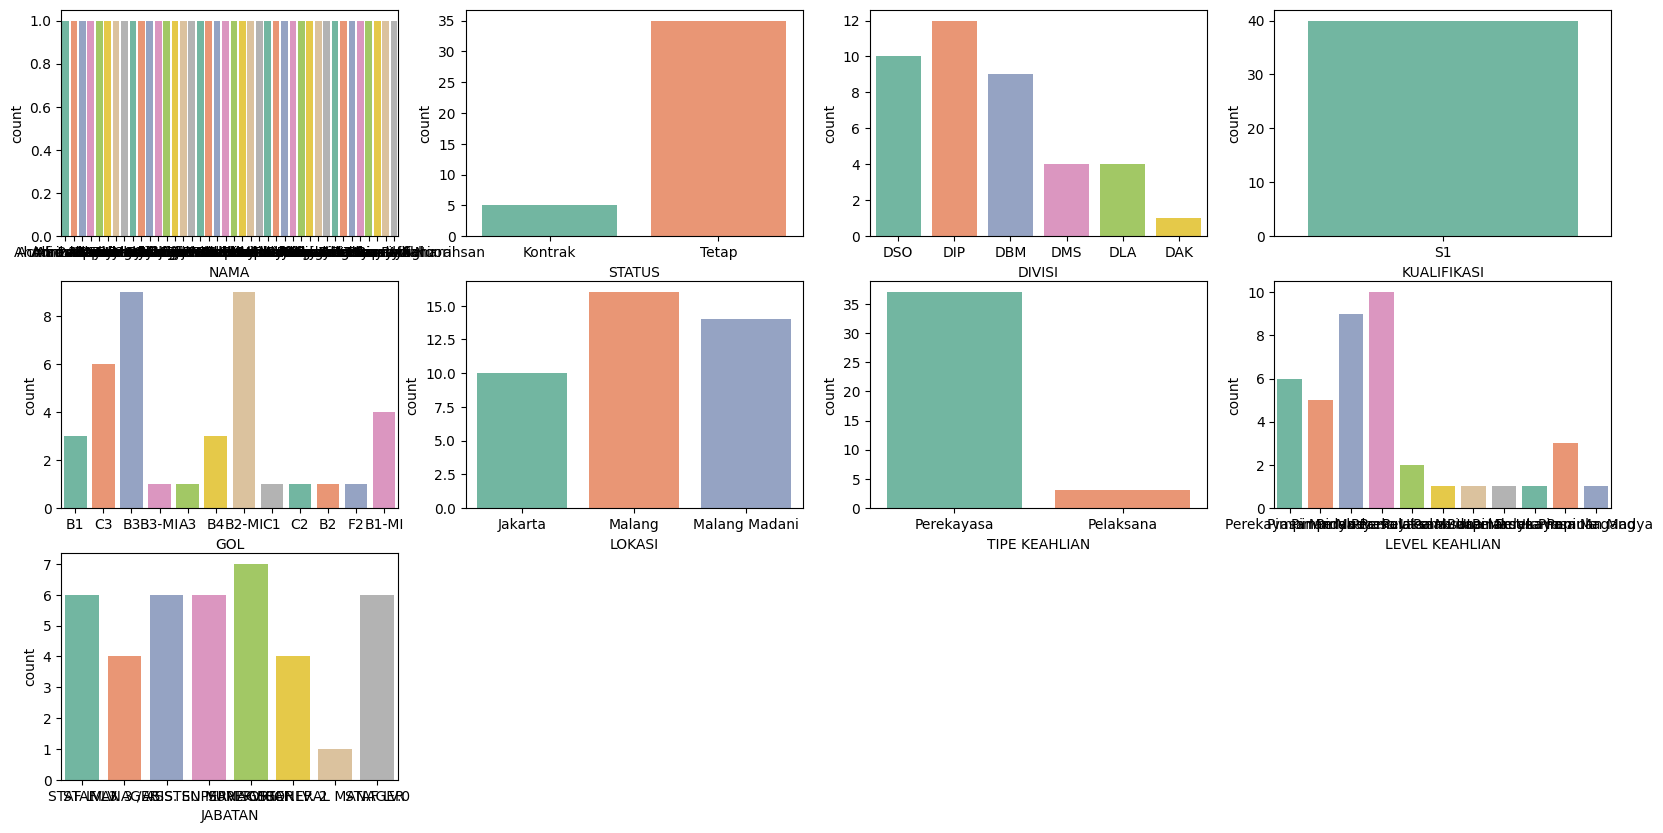

In [22]:
#seperating categorical from numerical data
df1c= df1[['NAMA', 'STATUS', 'DIVISI', 'KUALIFIKASI', 'GOL', 'LOKASI', 'TIPE KEAHLIAN', 'LEVEL KEAHLIAN', 'JABATAN']]
#correlation on categorical data
plt.figure(figsize = (20,10))
plt.subplot(3, 4, 1)
sns.countplot(x='NAMA', palette='Set2', data=df1c)
plt.subplot(3, 4, 2)
sns.countplot(x='STATUS', palette='Set2', data=df1c)
plt.subplot(3, 4, 3)
sns.countplot(x='DIVISI', palette='Set2', data=df1c)
plt.subplot(3, 4, 4)
sns.countplot(x='KUALIFIKASI', palette='Set2', data=df1c)
plt.subplot(3, 4, 5)
sns.countplot(x='GOL', palette='Set2', data=df1c)
plt.subplot(3, 4, 6)
sns.countplot(x='LOKASI', palette='Set2', data=df1c)
plt.subplot(3, 4, 7)
sns.countplot(x='TIPE KEAHLIAN', palette='Set2', data=df1c)
plt.subplot(3, 4, 8)
sns.countplot(x='LEVEL KEAHLIAN', palette='Set2', data=df1c)
plt.subplot(3, 4, 9)
sns.countplot(x='JABATAN', palette='Set2', data=df1c)

# Data Prep

In [ ]:
df1.head()

## TIPE KEAHLIAN Attributes

### Feature Selection

In [24]:
dfa1= df1.drop(['NAMA', 'NIK', 'TOTAL_TIME', 'KUALIFIKASI', 'LEVEL KEAHLIAN', 'JABATAN'], axis=1)
dfa1.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,TIPE KEAHLIAN,KELAS KEAHLIAN,KELAS JABATAN
0,0.0,2.0,Kontrak,3,DSO,B1,Jakarta,Perekayasa,6,2
1,7.0,6.0,Tetap,16,DSO,C3,Malang,Perekayasa,2,1
4,29.0,3.0,Tetap,9,DIP,B3,Malang,Perekayasa,2,7
5,0.0,51.0,Tetap,16,DIP,C3,Malang,Perekayasa,2,5
6,1066.0,11.0,Tetap,7,DSO,B3-MI,Malang Madani,Perekayasa,3,5


In [25]:
#data feature selection
X= dfa1.drop(['TIPE KEAHLIAN'], axis=1)
y= dfa1['TIPE KEAHLIAN']

In [26]:
y.shape

(40,)

In [27]:
X.shape

(40, 9)

In [28]:
X.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,KELAS KEAHLIAN,KELAS JABATAN
0,0.0,2.0,Kontrak,3,DSO,B1,Jakarta,6,2
1,7.0,6.0,Tetap,16,DSO,C3,Malang,2,1
4,29.0,3.0,Tetap,9,DIP,B3,Malang,2,7
5,0.0,51.0,Tetap,16,DIP,C3,Malang,2,5
6,1066.0,11.0,Tetap,7,DSO,B3-MI,Malang Madani,3,5


### Categorical Datas

In [29]:
X.dtypes

DURATIONS_PERPROJECT    float64
TOTAL_PROJECT           float64
STATUS                   object
LAMA_KERJA                int64
DIVISI                   object
GOL                      object
LOKASI                   object
KELAS KEAHLIAN            int64
KELAS JABATAN             int64
dtype: object

In [30]:
#objt(str) to category
X['STATUS'] = X['STATUS'].astype('category')
X['DIVISI'] = X['DIVISI'].astype('category')
X['GOL'] = X['GOL'].astype('category')
X['LOKASI'] = X['LOKASI'].astype('category')
X['KELAS KEAHLIAN']= X['KELAS KEAHLIAN'].astype('category')
X['KELAS JABATAN']= X['KELAS JABATAN'].astype('category')

In [31]:
X.dtypes

DURATIONS_PERPROJECT     float64
TOTAL_PROJECT            float64
STATUS                  category
LAMA_KERJA                 int64
DIVISI                  category
GOL                     category
LOKASI                  category
KELAS KEAHLIAN          category
KELAS JABATAN           category
dtype: object

In [32]:
X.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,KELAS KEAHLIAN,KELAS JABATAN
0,0.0,2.0,Kontrak,3,DSO,B1,Jakarta,6,2
1,7.0,6.0,Tetap,16,DSO,C3,Malang,2,1
4,29.0,3.0,Tetap,9,DIP,B3,Malang,2,7
5,0.0,51.0,Tetap,16,DIP,C3,Malang,2,5
6,1066.0,11.0,Tetap,7,DSO,B3-MI,Malang Madani,3,5


In [33]:
X.shape

(40, 9)

In [34]:
X.nunique()

DURATIONS_PERPROJECT    19
TOTAL_PROJECT           22
STATUS                   2
LAMA_KERJA              12
DIVISI                   6
GOL                     12
LOKASI                   3
KELAS KEAHLIAN           7
KELAS JABATAN            7
dtype: int64

In [35]:
categorical_columns = ['STATUS', 'DIVISI', 'GOL', 'LOKASI', 'KELAS KEAHLIAN', 'KELAS JABATAN']
encoder = OneHotEncoder(sparse_output=False)
encoded_cols = encoder.fit_transform(X[categorical_columns])

In [36]:
# Get the column names for the encoded columns
encoded_col_names = encoder.get_feature_names_out(categorical_columns)

In [37]:
# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoded_col_names)

In [38]:
# Drop the original categorical columns
X = X.drop(categorical_columns, axis=1)

In [39]:
#reset indices
X = X.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)

In [40]:
# Concatenate the DataFrame with the encoded columns
X = pd.concat([X, encoded_df], axis=1)

In [41]:
X

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,DIVISI_DMS,...,KELAS KEAHLIAN_5,KELAS KEAHLIAN_6,KELAS KEAHLIAN_7,KELAS JABATAN_1,KELAS JABATAN_2,KELAS JABATAN_3,KELAS JABATAN_4,KELAS JABATAN_5,KELAS JABATAN_6,KELAS JABATAN_7
0,0.0,2.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7.0,6.0,16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29.0,3.0,9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,51.0,16,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1066.0,11.0,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,17.0,1.0,11,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,6.0,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,3.0,9.0,15,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,757.0,2.0,14,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,6.0,9.0,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Train-test split

In [42]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 100)

In [43]:
X_train.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,DIVISI_DMS,...,KELAS KEAHLIAN_5,KELAS KEAHLIAN_6,KELAS KEAHLIAN_7,KELAS JABATAN_1,KELAS JABATAN_2,KELAS JABATAN_3,KELAS JABATAN_4,KELAS JABATAN_5,KELAS JABATAN_6,KELAS JABATAN_7
28,45.0,3.0,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,3.0,9.0,15,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33,23.0,28.0,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36,3.0,3.0,16,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22,52.0,5.0,11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
y_train.head()

39    Perekayasa
10    Perekayasa
51    Perekayasa
55    Perekayasa
31    Perekayasa
Name: TIPE KEAHLIAN, dtype: object

In [45]:
X_train.shape

(32, 40)

In [103]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 19 to 21
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DURATIONS_PERPROJECT  8 non-null      float64
 1   TOTAL_PROJECT         8 non-null      float64
 2   LAMA_KERJA            8 non-null      int64  
 3   STATUS_Kontrak        8 non-null      float64
 4   STATUS_Tetap          8 non-null      float64
 5   DIVISI_DAK            8 non-null      float64
 6   DIVISI_DBM            8 non-null      float64
 7   DIVISI_DIP            8 non-null      float64
 8   DIVISI_DLA            8 non-null      float64
 9   DIVISI_DMS            8 non-null      float64
 10  DIVISI_DSO            8 non-null      float64
 11  GOL_A3                8 non-null      float64
 12  GOL_B1                8 non-null      float64
 13  GOL_B1-MI             8 non-null      float64
 14  GOL_B2                8 non-null      float64
 15  GOL_B2-MI             8 non-nu

### X_train preprocess

In [47]:
X_train.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,DIVISI_DMS,...,KELAS KEAHLIAN_5,KELAS KEAHLIAN_6,KELAS KEAHLIAN_7,KELAS JABATAN_1,KELAS JABATAN_2,KELAS JABATAN_3,KELAS JABATAN_4,KELAS JABATAN_5,KELAS JABATAN_6,KELAS JABATAN_7
28,45.0,3.0,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,3.0,9.0,15,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33,23.0,28.0,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36,3.0,3.0,16,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22,52.0,5.0,11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [48]:
X_trainN= X_train[['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA']]

In [49]:
X_trainN.shape

(32, 3)

#### X_train normalization

In [50]:
#X_train normalization
scaler = MinMaxScaler()
X_trainN_normalized = scaler.fit_transform(X_trainN)
X_trainN_normalized = pd.DataFrame(X_trainN_normalized, columns=['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA'])
X_trainN_normalized = X_trainN_normalized.round(2)
X_trainN_normalized.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
0,0.04,0.04,0.13
1,0.00,0.16,0.93
2,0.02,0.54,0.20
3,0.00,0.04,1.00
4,0.05,0.08,0.67


#### X_train outliers

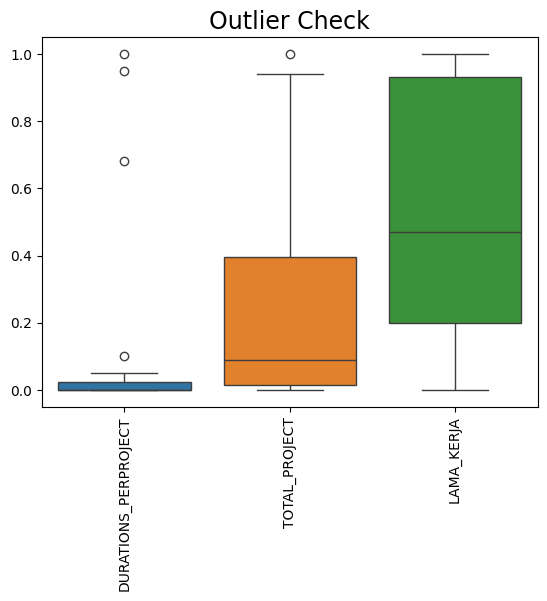

In [51]:
#X_train outliers
sns.boxplot(X_trainN_normalized)
plt.title("Outlier Check", size = 17)
plt.xticks(rotation = 90)
plt.show()

#### Handling outliers

##### DURATIONS_PERPROJECT

In [52]:
#handling outliers w IQR [DURATIONS]
q1= X_trainN_normalized['DURATIONS_PERPROJECT'].quantile(0.25)
q3= X_trainN_normalized['DURATIONS_PERPROJECT'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

(0.0, 0.0225, 0.0225)

In [53]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

(-0.011250000000000003, 0.05625)

In [54]:
# find the outliers of df
X_trainN_normalized.loc[(X_trainN_normalized['DURATIONS_PERPROJECT'] > upper_limit) | (X_trainN_normalized['DURATIONS_PERPROJECT'] < lower_limit)]

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
16,0.95,0.20,0.40
19,1.00,0.00,0.93
30,0.10,0.00,1.00
31,0.68,0.02,0.87


In [55]:
#trimming
X_train_nD= X_trainN_normalized.loc[(X_trainN_normalized['DURATIONS_PERPROJECT'] < upper_limit) & (X_trainN_normalized['DURATIONS_PERPROJECT'] > lower_limit)]
print('before removing outliers:', len(X_trainN_normalized))
print('after removing outliers:', len(X_train_nD))
print('outliers:', len(X_trainN_normalized) - len(X_train_nD))

before removing outliers: 32
after removing outliers: 28
outliers: 4


In [56]:
X_train_nD.shape

(28, 3)

<Axes: ylabel='DURATIONS_PERPROJECT'>

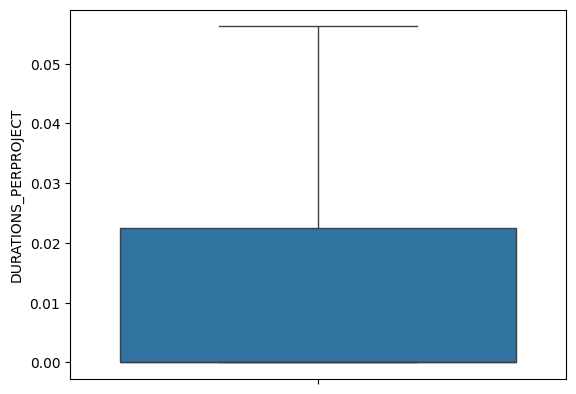

In [57]:
#capping: changing the outlier values to upper/lower limit values
X_train_nD = X_trainN_normalized.copy()
X_train_nD.loc[X_train_nD['DURATIONS_PERPROJECT'] > upper_limit, 'DURATIONS_PERPROJECT'] = upper_limit
X_train_nD.loc[X_train_nD['DURATIONS_PERPROJECT'] < lower_limit, 'DURATIONS_PERPROJECT'] = lower_limit
sns.boxplot(X_train_nD['DURATIONS_PERPROJECT'])

In [58]:
X_train_nD.shape

(32, 3)

In [59]:
X_train_nD= X_train_nD.drop(['TOTAL_PROJECT', 'LAMA_KERJA'], axis=1)
X_train_nD.shape

(32, 1)

In [60]:
X_train_nD.head().round(2)

,DURATIONS_PERPROJECT
0,0.04
1,0.00
2,0.02
3,0.00
4,0.05


##### TOTAL_PROJECT

In [61]:
#handling outliers w IQR [TOTAL_PROJECT]
q1= X_trainN_normalized['TOTAL_PROJECT'].quantile(0.25)
q3= X_trainN_normalized['TOTAL_PROJECT'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

(0.015, 0.395, 0.38)

In [62]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

(-0.17500000000000004, 0.9650000000000001)

In [63]:
# find the outliers of df
X_trainN_normalized.loc[(X_trainN_normalized['TOTAL_PROJECT'] > upper_limit) | (X_trainN_normalized['TOTAL_PROJECT'] < lower_limit)]

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
29,0.0,1.0,1.0


In [64]:
#trimming
X_train_nP= X_trainN_normalized.loc[(X_trainN_normalized['TOTAL_PROJECT'] < upper_limit) & (X_trainN_normalized['TOTAL_PROJECT'] > lower_limit)]
print('before removing outliers:', len(X_trainN_normalized))
print('after removing outliers:', len(X_train_nD))
print('outliers:', len(X_trainN_normalized) - len(X_train_nP))

before removing outliers: 32
after removing outliers: 32
outliers: 1


<Axes: ylabel='TOTAL_PROJECT'>

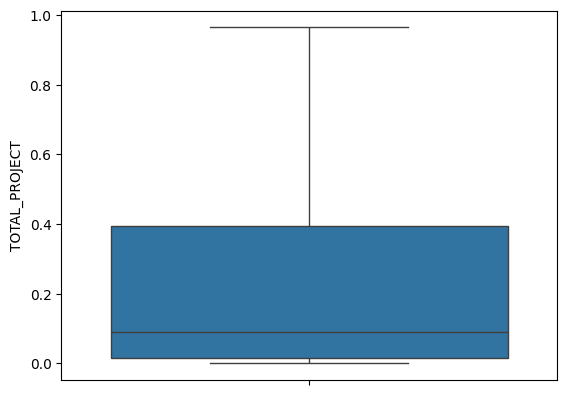

In [65]:
#capping: changing the outlier values to upper/lower limit values
X_train_nP = X_trainN_normalized.copy()
X_train_nP.loc[X_train_nP['TOTAL_PROJECT'] > upper_limit, 'TOTAL_PROJECT'] = upper_limit
X_train_nP.loc[X_train_nP['TOTAL_PROJECT'] < lower_limit, 'TOTAL_PROJECT'] = lower_limit
sns.boxplot(X_train_nP['TOTAL_PROJECT'])

In [66]:
X_train_nP.shape

(32, 3)

In [67]:
X_train_nP= X_train_nP.drop(['DURATIONS_PERPROJECT', 'LAMA_KERJA'], axis=1)
X_train_nP.shape

(32, 1)

In [68]:
X_train_nP.head().round(2)

,TOTAL_PROJECT
0,0.04
1,0.16
2,0.54
3,0.04
4,0.08


##### TOTAL_TIME

In [ ]:
q1= X_trainN_normalized['TOTAL_TIME'].quantile(0.25)
q3= X_trainN_normalized['TOTAL_TIME'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

In [ ]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

In [ ]:
# find the outliers of df
X_trainN_normalized.loc[(X_trainN_normalized['TOTAL_TIME'] > upper_limit) | (X_trainN_normalized['TOTAL_TIME'] < lower_limit)]

In [ ]:
#trimming
X_train_nT= X_trainN_normalized.loc[(X_trainN_normalized['TOTAL_TIME'] < upper_limit) & (X_trainN_normalized['TOTAL_TIME'] > lower_limit)]
print('before removing outliers:', len(X_trainN_normalized))
print('after removing outliers:', len(X_train_nT))
print('outliers:', len(X_trainN_normalized) - len(X_train_nT))

In [ ]:
#capping: changing the outlier values to upper/lower limit values
X_train_nT = X_trainN_normalized.copy()
X_train_nT.loc[X_train_nT['TOTAL_TIME'] > upper_limit, 'TOTAL_TIME'] = upper_limit
X_train_nT.loc[X_train_nT['TOTAL_TIME'] < lower_limit, 'TOTAL_TIME'] = lower_limit
sns.boxplot(X_train_nT['TOTAL_TIME'])

In [ ]:
X_train_nT.shape

In [ ]:
X_train_nT= X_train_nT.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA'], axis=1)
X_train_nT.shape

In [ ]:
X_train_nT.head().round(2)

##### Concat

In [70]:
X_trainN_normalized.shape

(32, 3)

In [71]:
X_trainN_normalized.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
0,0.04,0.04,0.13
1,0.00,0.16,0.93
2,0.02,0.54,0.20
3,0.00,0.04,1.00
4,0.05,0.08,0.67


In [72]:
X_trainN_normalized= X_trainN_normalized.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT'], axis=1)

In [73]:
X_trainN_normalized.head()

,LAMA_KERJA
0,0.13
1,0.93
2,0.20
3,1.00
4,0.67


In [74]:
#reuniting them to X_train
X_trainNum = pd.concat([X_train_nD, X_train_nP, X_trainN_normalized], axis=1)

In [75]:
X_trainNum.shape

(32, 3)

In [76]:
X_trainNum.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
0,0.04,0.04,0.13
1,0.00,0.16,0.93
2,0.02,0.54,0.20
3,0.00,0.04,1.00
4,0.05,0.08,0.67


#### X_train concat

In [77]:
X_train.shape

(32, 40)

In [78]:
X_train.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,DIVISI_DMS,...,KELAS KEAHLIAN_5,KELAS KEAHLIAN_6,KELAS KEAHLIAN_7,KELAS JABATAN_1,KELAS JABATAN_2,KELAS JABATAN_3,KELAS JABATAN_4,KELAS JABATAN_5,KELAS JABATAN_6,KELAS JABATAN_7
28,45.0,3.0,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,3.0,9.0,15,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33,23.0,28.0,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36,3.0,3.0,16,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22,52.0,5.0,11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [79]:
X_train= X_train.copy()

In [80]:
X_train= X_train.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA'], axis=1)

In [81]:
X_train.head()

,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,DIVISI_DMS,DIVISI_DSO,GOL_A3,GOL_B1,...,KELAS KEAHLIAN_5,KELAS KEAHLIAN_6,KELAS KEAHLIAN_7,KELAS JABATAN_1,KELAS JABATAN_2,KELAS JABATAN_3,KELAS JABATAN_4,KELAS JABATAN_5,KELAS JABATAN_6,KELAS JABATAN_7
28,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [82]:
#combining the final X_train

#checking the indices
print(X_trainNum.index)
print(X_train.index)

RangeIndex(start=0, stop=32, step=1)
Index([28,  7, 33, 36, 22, 18, 37,  5, 13,  1, 26, 12, 29,  9, 27, 11,  4, 35,
       38, 16, 17, 31, 14, 32,  2, 30, 10, 15, 23,  3, 24,  8],
      dtype='int64')


In [83]:
#reset indices
X_trainNum = X_trainNum.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)

In [84]:
#concating
X_train = pd.concat([X_trainNum, X_train], axis=1)

In [85]:
X_train.shape

(32, 40)

In [86]:
X_train.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,DIVISI_DMS,...,KELAS KEAHLIAN_5,KELAS KEAHLIAN_6,KELAS KEAHLIAN_7,KELAS JABATAN_1,KELAS JABATAN_2,KELAS JABATAN_3,KELAS JABATAN_4,KELAS JABATAN_5,KELAS JABATAN_6,KELAS JABATAN_7
0,0.04,0.04,0.13,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.00,0.16,0.93,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.02,0.54,0.20,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.00,0.04,1.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.05,0.08,0.67,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## LEVEL KEAHLIAN Attributes

In [87]:
df1.head()

,NAMA,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,NIK,STATUS,LAMA_KERJA,DIVISI,KUALIFIKASI,GOL,LOKASI,TIPE KEAHLIAN,KELAS KEAHLIAN,LEVEL KEAHLIAN,KELAS JABATAN,JABATAN
0,Achmad Fauzi,0.0,2.0,2602.0,350000,Kontrak,3,DSO,S1,B1,Jakarta,Perekayasa,6,Perekayasa Madya,2,STAF LV. 3
1,Adi Pratama,7.0,6.0,8064.0,"8502,013",Tetap,16,DSO,S1,C3,Malang,Perekayasa,2,Pimpinan Muda,1,MANAGER
4,Afrizal Aditya,29.0,3.0,56.0,"9301,057",Tetap,9,DIP,S1,B3,Malang,Perekayasa,2,Pimpinan Pemula,7,STAF LV. 3 / ASS. SUPERVISOR
5,Ahmad Azhar Mashuri,0.0,51.0,3734.0,"8310,019",Tetap,16,DIP,S1,C3,Malang,Perekayasa,2,Pimpinan Muda,5,MANAGER
6,Ahmad Nashruddin,1066.0,11.0,14329.0,190101,Tetap,7,DSO,S1,B3-MI,Malang Madani,Perekayasa,3,Perekayasa Utama,5,STAF LV. 3 / ASS. SUPERVISOR


In [131]:
dfa2= df1.drop(['NAMA', 'NIK', 'TOTAL_TIME', 'KUALIFIKASI', 'TIPE KEAHLIAN', 'JABATAN', 'KELAS  KEAHLIAN'], axis=1)
dfa2.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,KELAS KEAHLIAN,LEVEL KEAHLIAN,KELAS JABATAN
0,0.0,2.0,Kontrak,3,DSO,B1,Jakarta,6,Perekayasa Madya,2
1,7.0,6.0,Tetap,16,DSO,C3,Malang,2,Pimpinan Muda,1
4,29.0,3.0,Tetap,9,DIP,B3,Malang,2,Pimpinan Pemula,7
5,0.0,51.0,Tetap,16,DIP,C3,Malang,2,Pimpinan Muda,5
6,1066.0,11.0,Tetap,7,DSO,B3-MI,Malang Madani,3,Perekayasa Utama,5


In [134]:
test= dfa2.groupby(['LEVEL KEAHLIAN'])

In [135]:
test

### Feature Selection

In [137]:
#data feature selection
X2= dfa2.drop(['LEVEL KEAHLIAN'], axis=1)
y2= dfa2['LEVEL KEAHLIAN']

In [138]:
X2.shape

(40, 9)

In [139]:
y2.shape

(40,)

In [140]:
X2.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,KELAS KEAHLIAN,KELAS JABATAN
0,0.0,2.0,Kontrak,3,DSO,B1,Jakarta,6,2
1,7.0,6.0,Tetap,16,DSO,C3,Malang,2,1
4,29.0,3.0,Tetap,9,DIP,B3,Malang,2,7
5,0.0,51.0,Tetap,16,DIP,C3,Malang,2,5
6,1066.0,11.0,Tetap,7,DSO,B3-MI,Malang Madani,3,5


### Categorical Datas

In [141]:
X2.dtypes

DURATIONS_PERPROJECT    float64
TOTAL_PROJECT           float64
STATUS                   object
LAMA_KERJA                int64
DIVISI                   object
GOL                      object
LOKASI                   object
KELAS KEAHLIAN            int64
KELAS JABATAN             int64
dtype: object

In [142]:
#objt(str) to category
X2['STATUS'] = X2['STATUS'].astype('category')
X2['DIVISI'] = X2['DIVISI'].astype('category')
X2['GOL'] = X2['GOL'].astype('category')
X2['LOKASI'] = X2['LOKASI'].astype('category')
X2['KELAS KEAHLIAN']= X2['KELAS KEAHLIAN'].astype('category')
X2['KELAS JABATAN']= X2['KELAS JABATAN'].astype('category')

In [143]:
X2.dtypes

DURATIONS_PERPROJECT     float64
TOTAL_PROJECT            float64
STATUS                  category
LAMA_KERJA                 int64
DIVISI                  category
GOL                     category
LOKASI                  category
KELAS KEAHLIAN          category
KELAS JABATAN           category
dtype: object

In [144]:
X2.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,KELAS KEAHLIAN,KELAS JABATAN
0,0.0,2.0,Kontrak,3,DSO,B1,Jakarta,6,2
1,7.0,6.0,Tetap,16,DSO,C3,Malang,2,1
4,29.0,3.0,Tetap,9,DIP,B3,Malang,2,7
5,0.0,51.0,Tetap,16,DIP,C3,Malang,2,5
6,1066.0,11.0,Tetap,7,DSO,B3-MI,Malang Madani,3,5


In [145]:
X2.shape

(40, 9)

In [146]:
X2.nunique()

DURATIONS_PERPROJECT    19
TOTAL_PROJECT           22
STATUS                   2
LAMA_KERJA              12
DIVISI                   6
GOL                     12
LOKASI                   3
KELAS KEAHLIAN           7
KELAS JABATAN            7
dtype: int64

In [147]:
categorical_columns = ['STATUS', 'DIVISI', 'GOL', 'LOKASI', 'KELAS KEAHLIAN', 'KELAS JABATAN']
encoder = OneHotEncoder(sparse_output=False)
encoded_cols = encoder.fit_transform(X2[categorical_columns])

In [148]:
# Get the column names for the encoded columns
encoded_col_names = encoder.get_feature_names_out(categorical_columns)

In [149]:
# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoded_col_names)

In [150]:
# Drop the original categorical columns
X2 = X2.drop(categorical_columns, axis=1)

In [151]:
#reset indices
X2 = X2.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)

In [152]:
# Concatenate the DataFrame with the encoded columns
X2 = pd.concat([X2, encoded_df], axis=1)

In [153]:
X2

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,DIVISI_DMS,...,KELAS KEAHLIAN_5,KELAS KEAHLIAN_6,KELAS KEAHLIAN_7,KELAS JABATAN_1,KELAS JABATAN_2,KELAS JABATAN_3,KELAS JABATAN_4,KELAS JABATAN_5,KELAS JABATAN_6,KELAS JABATAN_7
0,0.0,2.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7.0,6.0,16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29.0,3.0,9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,51.0,16,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1066.0,11.0,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,17.0,1.0,11,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,6.0,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,3.0,9.0,15,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,757.0,2.0,14,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,6.0,9.0,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Train-test split

In [154]:
X

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,DIVISI_DMS,...,KELAS KEAHLIAN_5,KELAS KEAHLIAN_6,KELAS KEAHLIAN_7,KELAS JABATAN_1,KELAS JABATAN_2,KELAS JABATAN_3,KELAS JABATAN_4,KELAS JABATAN_5,KELAS JABATAN_6,KELAS JABATAN_7
0,0.0,2.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7.0,6.0,16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29.0,3.0,9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,51.0,16,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1066.0,11.0,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,17.0,1.0,11,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,6.0,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,3.0,9.0,15,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,757.0,2.0,14,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,6.0,9.0,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [155]:
#train test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state= 100)

In [156]:
X2_train.shape

(32, 40)

In [157]:
X2_test.shape

(8, 40)

In [158]:
y2_train.value_counts()

LEVEL KEAHLIAN
Pimpinan Pemula      8
Perekayasa Utama     8
Perekayasa Madya     4
Pimpinan Muda        3
Perekayasa Muda      2
Perekayasa Magang    2
Pimpinan Utama       1
Pelaksana Madya      1
Pimpinan Madya       1
Pelaksana Utama      1
Pelaksana Pemula     1
Name: count, dtype: int64

In [159]:
y2_test.value_counts()

LEVEL KEAHLIAN
Perekayasa Utama     2
Pimpinan Muda        2
Perekayasa Madya     2
Pimpinan Pemula      1
Perekayasa Magang    1
Name: count, dtype: int64

there are some imbalance data between train and test, the datas that are not in y2_test are;
1. Perekayasa Muda  = 2
2. Pimpinan Utama   = 1
3. Pelaksana Madya  = 1
4. Pimpinan Madya   = 1
5. Pelaksana Utama  = 1
6. Pelaksana Pemula = 1

### X_train preprocess

In [ ]:
X2_train.head()

In [ ]:
#seperating the numericals only
X2_trainN= X2_train[['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA']]

In [ ]:
X2_trainN.shape

#### X_train normalization

In [ ]:
#X_train normalization
scaler = MinMaxScaler()
X2_trainN_normalized = scaler.fit_transform(X2_trainN)
X2_trainN_normalized = pd.DataFrame(X2_trainN_normalized, columns=['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA'])
X2_trainN_normalized = X2_trainN_normalized.round(2)
X2_trainN_normalized.head()

#### X_train outliers

In [ ]:
sns.boxplot(X2_trainN_normalized)
plt.title("Outlier Check", size = 17)
plt.xticks(rotation = 90)
plt.show()

#### Handling Outliers

##### DURATIONS_PERPROJECT

In [ ]:
q1= X2_trainN_normalized['DURATIONS_PERPROJECT'].quantile(0.25)
q3= X2_trainN_normalized['DURATIONS_PERPROJECT'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

In [ ]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

In [ ]:
# find the outliers of df
X2_trainN_normalized.loc[(X2_trainN_normalized['DURATIONS_PERPROJECT'] > upper_limit) | (X2_trainN_normalized['DURATIONS_PERPROJECT'] < lower_limit)]

In [ ]:
#trimming
X2_train_nD= X2_trainN_normalized.loc[(X2_trainN_normalized['DURATIONS_PERPROJECT'] < upper_limit) & (X2_trainN_normalized['DURATIONS_PERPROJECT'] > lower_limit)]
print('before removing outliers:', len(X2_trainN_normalized))
print('after removing outliers:', len(X2_train_nD))
print('outliers:', len(X2_trainN_normalized) - len(X2_train_nD))

In [ ]:
X2_train_nD.shape

In [ ]:
#capping: changing the outlier values to upper/lower limit values
X2_train_nD = X2_trainN_normalized.copy()
X2_train_nD.loc[X2_train_nD['DURATIONS_PERPROJECT'] > upper_limit, 'DURATIONS_PERPROJECT'] = upper_limit
X2_train_nD.loc[X2_train_nD['DURATIONS_PERPROJECT'] < lower_limit, 'DURATIONS_PERPROJECT'] = lower_limit
sns.boxplot(X2_train_nD['DURATIONS_PERPROJECT'])

In [ ]:
X2_train_nD.shape

In [ ]:
X2_train_nD= X2_train_nD.drop(['TOTAL_PROJECT', 'LAMA_KERJA'], axis=1)
X2_train_nD.shape

In [ ]:
X2_train_nD.head().round(2)

##### TOTAL_PROJECT

In [ ]:
#handling outliers w IQR [TOTAL_PROJECT]
q1= X2_trainN_normalized['TOTAL_PROJECT'].quantile(0.25)
q3= X2_trainN_normalized['TOTAL_PROJECT'].quantile(0.75)
iqr= q3-q1

upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)

# find the outliers of df
X2_trainN_normalized.loc[(X2_trainN_normalized['TOTAL_PROJECT'] > upper_limit) | (X2_trainN_normalized['TOTAL_PROJECT'] < lower_limit)]

In [ ]:
#trimming
X2_train_nP= X2_trainN_normalized.loc[(X2_trainN_normalized['TOTAL_PROJECT'] < upper_limit) & (X2_trainN_normalized['TOTAL_PROJECT'] > lower_limit)]
print('before removing outliers:', len(X2_trainN_normalized))
print('after removing outliers:', len(X2_train_nD))
print('outliers:', len(X2_trainN_normalized) - len(X2_train_nP))

In [ ]:
#capping: changing the outlier values to upper/lower limit values
X2_train_nP = X2_trainN_normalized.copy()
X2_train_nP.loc[X2_train_nP['TOTAL_PROJECT'] > upper_limit, 'TOTAL_PROJECT'] = upper_limit
X2_train_nP.loc[X2_train_nP['TOTAL_PROJECT'] < lower_limit, 'TOTAL_PROJECT'] = lower_limit
sns.boxplot(X2_train_nP['TOTAL_PROJECT'])

In [ ]:
X2_train_nP= X2_train_nP.drop(['DURATIONS_PERPROJECT', 'LAMA_KERJA'], axis=1)
X2_train_nP.shape

In [ ]:
X2_train_nP.head().round(2)

##### TOTAL_TIME

In [ ]:
q1= X2_trainN_normalized['TOTAL_TIME'].quantile(0.25)
q3= X2_trainN_normalized['TOTAL_TIME'].quantile(0.75)
iqr= q3-q1

upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)

# find the outliers of df
X2_trainN_normalized.loc[(X2_trainN_normalized['TOTAL_TIME'] > upper_limit) | (X2_trainN_normalized['TOTAL_TIME'] < lower_limit)]

In [ ]:
#trimming
X2_train_nT= X2_trainN_normalized.loc[(X2_trainN_normalized['TOTAL_TIME'] < upper_limit) & (X2_trainN_normalized['TOTAL_TIME'] > lower_limit)]
print('before removing outliers:', len(X2_trainN_normalized))
print('after removing outliers:', len(X2_train_nT))
print('outliers:', len(X2_trainN_normalized) - len(X2_train_nT))

In [ ]:
#capping: changing the outlier values to upper/lower limit values
X2_train_nT = X2_trainN_normalized.copy()
X2_train_nT.loc[X2_train_nT['TOTAL_TIME'] > upper_limit, 'TOTAL_TIME'] = upper_limit
X2_train_nT.loc[X2_train_nT['TOTAL_TIME'] < lower_limit, 'TOTAL_TIME'] = lower_limit
sns.boxplot(X2_train_nT['TOTAL_TIME'])

In [ ]:
X2_train_nT= X2_train_nT.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA'], axis=1)
X2_train_nT.shape

In [ ]:
X2_train_nT.head().round(2)

#### Final X2_trainN

In [ ]:
X2_trainN_normalized.shape

In [ ]:
X2_trainN_normalized.head()

In [ ]:
X2_trainN_normalized= X2_trainN_normalized.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT'], axis=1)

In [ ]:
X2_trainN_normalized.head()

In [ ]:
#reuniting them to X_train
X2_trainNum = pd.concat([X2_train_nD, X2_train_nP, X2_trainN_normalized], axis=1)

In [ ]:
X2_trainNum.shape

In [ ]:
X2_trainNum.head()

#### X2_train

In [ ]:
X2_train.shape

In [ ]:
X2_train.head()

In [ ]:
X2_train= X2_train.copy()

In [ ]:
X2_train= X2_train.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA'], axis=1)

In [ ]:
#combining the final X_train

#checking the indices
print(X2_trainNum.index)
print(X2_train.index)

In [ ]:
#reset indices
X2_trainNum = X2_trainNum.reset_index(drop=True)
X2_train = X2_train.reset_index(drop=True)

In [ ]:
#concating
X2_train = pd.concat([X2_trainNum, X2_train], axis=1)

In [ ]:
X2_train.shape

In [ ]:
X2_train.head()

## KELAS_ JABATAN

In [ ]:
df1.head()

In [ ]:
#dropping the other attributes and NAMA
dfa3= df1.drop(['NAMA', 'NIK', 'TOTAL_TIME', 'KUALIFIKASI', 'LEVEL KEAHLIAN', 'TIPE KEAHLIAN'], axis=1)
dfa3.head()

### Feature selection

In [ ]:
#data feature selection
X3= dfa3.drop(['JABATAN'], axis=1)
y3= dfa3['JABATAN']

In [ ]:
X3.head()

### Categorical data

In [ ]:
#objt(str) to category
X3['STATUS'] = X3['STATUS'].astype('category')
X3['DIVISI'] = X3['DIVISI'].astype('category')
X3['GOL'] = X3['GOL'].astype('category')
X3['LOKASI'] = X3['LOKASI'].astype('category')
X3['KELAS KEAHLIAN']= X3['KELAS KEAHLIAN'].astype('category')
X3['KELAS JABATAN']= X3['KELAS JABATAN'].astype('category')

In [ ]:
X3.dtypes

In [ ]:
categorical_columns = ['STATUS', 'DIVISI', 'GOL', 'LOKASI', 'KELAS KEAHLIAN', 'KELAS JABATAN']
encoder = OneHotEncoder(sparse_output=False)
encoded_cols = encoder.fit_transform(X3[categorical_columns])

In [ ]:
# Get the column names for the encoded columns
encoded_col_names = encoder.get_feature_names_out(categorical_columns)

In [ ]:
# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoded_col_names)

In [ ]:
# Drop the original categorical columns
X3 = X3.drop(categorical_columns, axis=1)

In [ ]:
#reset indices
X3 = X3.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)

In [ ]:
# Concatenate the DataFrame with the encoded columns
X3 = pd.concat([X3, encoded_df], axis=1)

In [ ]:
X3

### Train-test split

In [ ]:
#train test split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state= 100)

kfold trial

In [ ]:
min_class_size = min(y3_train.value_counts())

In [ ]:
# Set k_neighbors to be less than or equal to the minimum class size - 1
#k_neighbors = min(1, min_class_size - 1)

In [ ]:
#handling imbalanced data w/ RandomOverSampler
sm = RandomOverSampler(random_state=42)
X3_train_res, y3_train_res = sm.fit_resample(X3_train, y3_train)

#handling imbalanced data w/ SMOTE
#sm= SMOTE(random_state=42, k_neighbors=k_neighbors)
#X3_resampled, y3_resampled = sm.fit_resample(X3_train, y3_train)


#### Trial using Kfold

unable to use kfold cause 

KeyError: "None of [Index([1, 2, 3, 5, 7, 10, 11, 14, 18, 20, 21, 22, 23, 28, 29, 30, 32, 35, 36,\n       38],\n      dtype='int32')] are in the [columns]"

In [ ]:
#try using kfold
from sklearn.model_selection import KFold
k = 2
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [ ]:
for train_index, test_index in kf.split(X3):
    # Split the data into training and testing sets
    X3_train, X3_test = X3[train_index], X3[test_index]
    y3_train, y3_test = y3[train_index], y3[test_index]


#error here

In [ ]:
X3_train.shape

In [ ]:
X3_test.shape

In [ ]:
y3_train.value_counts()

In [ ]:
y3_test.value_counts()

datas that are not in y3_test
1. STAF LV. 3 / ASS. SUPERVISOR
2. GENERAL MANAGER

### X3_train preprocess

In [ ]:
X3_train.head()

In [ ]:
X3_trainN= X3_train[['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA']]

In [ ]:
X3_trainN.shape

#### X3_train normalization

In [ ]:
#X_train normalization
scaler = MinMaxScaler()
X3_trainN_normalized = scaler.fit_transform(X3_trainN)
X3_trainN_normalized = pd.DataFrame(X3_trainN_normalized, columns=['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA'])
X3_trainN_normalized = X3_trainN_normalized.round(2)
X3_trainN_normalized.head()

#### X3_train outliers

In [ ]:
#X_train outliers
sns.boxplot(X3_trainN_normalized)
plt.title("Outlier Check", size = 17)
plt.xticks(rotation = 90)
plt.show()

#### Handling Outliers

##### DURATIONS_PERPROJECT

In [ ]:
q1= X3_trainN_normalized['DURATIONS_PERPROJECT'].quantile(0.25)
q3= X3_trainN_normalized['DURATIONS_PERPROJECT'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

In [ ]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

In [ ]:
# find the outliers of df
X3_trainN_normalized.loc[(X3_trainN_normalized['DURATIONS_PERPROJECT'] > upper_limit) | (X3_trainN_normalized['DURATIONS_PERPROJECT'] < lower_limit)]

In [ ]:
#trimming
X3_train_nD= X3_trainN_normalized.loc[(X3_trainN_normalized['DURATIONS_PERPROJECT'] < upper_limit) & (X3_trainN_normalized['DURATIONS_PERPROJECT'] > lower_limit)]
print('before removing outliers:', len(X3_trainN_normalized))
print('after removing outliers:', len(X3_train_nD))
print('outliers:', len(X3_trainN_normalized) - len(X3_train_nD))

In [ ]:
X3_train_nD.shape

In [ ]:
#capping: changing the outlier values to upper/lower limit values
X3_train_nD = X3_trainN_normalized.copy()
X3_train_nD.loc[X3_train_nD['DURATIONS_PERPROJECT'] > upper_limit, 'DURATIONS_PERPROJECT'] = upper_limit
X3_train_nD.loc[X3_train_nD['DURATIONS_PERPROJECT'] < lower_limit, 'DURATIONS_PERPROJECT'] = lower_limit
sns.boxplot(X3_train_nD['DURATIONS_PERPROJECT'])

In [ ]:
X3_train_nD.shape

In [ ]:
X3_train_nD= X3_train_nD.drop(['TOTAL_PROJECT', 'LAMA_KERJA'], axis=1)
X3_train_nD.shape

In [ ]:
X3_train_nD.head().round(2)

##### TOTAL_PROJECT

In [ ]:
#handling outliers w IQR [TOTAL_PROJECT]
q1= X3_trainN_normalized['TOTAL_PROJECT'].quantile(0.25)
q3= X3_trainN_normalized['TOTAL_PROJECT'].quantile(0.75)
iqr= q3-q1

upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)

# find the outliers of df
X3_trainN_normalized.loc[(X3_trainN_normalized['TOTAL_PROJECT'] > upper_limit) | (X3_trainN_normalized['TOTAL_PROJECT'] < lower_limit)]

In [ ]:
#trimming
X3_train_nP= X3_trainN_normalized.loc[(X3_trainN_normalized['TOTAL_PROJECT'] < upper_limit) & (X3_trainN_normalized['TOTAL_PROJECT'] > lower_limit)]
print('before removing outliers:', len(X3_trainN_normalized))
print('after removing outliers:', len(X3_train_nD))
print('outliers:', len(X3_trainN_normalized) - len(X3_train_nP))

In [ ]:
#capping: changing the outlier values to upper/lower limit values
X3_train_nP = X3_trainN_normalized.copy()
X3_train_nP.loc[X3_train_nP['TOTAL_PROJECT'] > upper_limit, 'TOTAL_PROJECT'] = upper_limit
X3_train_nP.loc[X3_train_nP['TOTAL_PROJECT'] < lower_limit, 'TOTAL_PROJECT'] = lower_limit
sns.boxplot(X3_train_nP['TOTAL_PROJECT'])

In [ ]:
X3_train_nP= X3_train_nP.drop(['DURATIONS_PERPROJECT', 'LAMA_KERJA'], axis=1)
X3_train_nP.head().round(2)

##### TOTAL_TIME

In [ ]:
q1= X3_trainN_normalized['TOTAL_TIME'].quantile(0.25)
q3= X3_trainN_normalized['TOTAL_TIME'].quantile(0.75)
iqr= q3-q1

upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)

# find the outliers of df
X3_trainN_normalized.loc[(X3_trainN_normalized['TOTAL_TIME'] > upper_limit) | (X3_trainN_normalized['TOTAL_TIME'] < lower_limit)]

In [ ]:
#trimming
X3_train_nT= X3_trainN_normalized.loc[(X3_trainN_normalized['TOTAL_TIME'] < upper_limit) & (X3_trainN_normalized['TOTAL_TIME'] > lower_limit)]
print('before removing outliers:', len(X3_trainN_normalized))
print('after removing outliers:', len(X3_train_nT))
print('outliers:', len(X3_trainN_normalized) - len(X3_train_nT))

In [ ]:
#capping: changing the outlier values to upper/lower limit values
X3_train_nT = X3_trainN_normalized.copy()
X3_train_nT.loc[X3_train_nT['TOTAL_TIME'] > upper_limit, 'TOTAL_TIME'] = upper_limit
X3_train_nT.loc[X3_train_nT['TOTAL_TIME'] < lower_limit, 'TOTAL_TIME'] = lower_limit
sns.boxplot(X3_train_nT['TOTAL_TIME'])

In [ ]:
X3_train_nT= X3_train_nT.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA'], axis=1)

In [ ]:
X3_train_nT.head().round(2)

#### Final X3_trainN

In [ ]:
X3_trainN_normalized.head()

In [ ]:
X3_trainN_normalized= X3_trainN_normalized.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT'], axis=1)

In [ ]:
#reuniting them to X_train
X3_trainNum = pd.concat([X3_train_nD, X3_train_nP, X3_trainN_normalized], axis=1)

In [ ]:
X3_trainNum.head()

#### Final X3_train

In [ ]:
X3_train.head()

In [ ]:
X3_train= X3_train.copy()

In [ ]:
X3_train= X3_train.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA'], axis=1)

In [ ]:
#combining the final X_train

#checking the indices
print(X3_trainNum.index)
print(X3_train.index)

In [ ]:
#reset indices
X3_trainNum = X3_trainNum.reset_index(drop=True)
X3_train = X3_train.reset_index(drop=True)

In [ ]:
#concating
X3_train = pd.concat([X3_trainNum, X3_train], axis=1)

In [ ]:
X3_train.shape

In [ ]:
X3_train.head()

# Data Model & Eval

## TIPE KEAHLIAN 

### DecisionTreeClassifier

In [127]:
dt = tree.DecisionTreeClassifier()

In [128]:
dt.fit(X_train2, y_train)

DecisionTreeClassifier()

In [91]:
X_test

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,DIVISI_DMS,...,KELAS KEAHLIAN_5,KELAS KEAHLIAN_6,KELAS KEAHLIAN_7,KELAS JABATAN_1,KELAS JABATAN_2,KELAS JABATAN_3,KELAS JABATAN_4,KELAS JABATAN_5,KELAS JABATAN_6,KELAS JABATAN_7
19,2477.0,2.0,11,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,6.0,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20,0.0,2.0,16,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0,0.0,2.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34,1.0,18.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25,7.0,4.0,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39,0.0,11.0,16,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21,5.0,10.0,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [110]:
pd.set_option('display.max_rows', None)

In [ ]:
X_test2= X_test.drop(['KELAS KEAHLIAN_1', 'KELAS KEAHLIAN_2', 'KELAS KEAHLIAN_'])

In [122]:
X_test2= X_test[['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA', 'STATUS_Kontrak', 'STATUS_Tetap', 'DIVISI_DAK', 'DIVISI_DBM', 'DIVISI_DIP', 'DIVISI_DLA', 'DIVISI_DMS', 'DIVISI_DSO', 'GOL_A3', 'GOL_B1', 'GOL_B1-MI', 'GOL_B2', 'GOL_B2-MI', 'GOL_B3', 'GOL_C1', 'GOL_C2', 'GOL_C3', 'GOL_F2']]

In [126]:
X_train2= X_train[['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA', 'STATUS_Kontrak', 'STATUS_Tetap', 'DIVISI_DAK', 'DIVISI_DBM', 'DIVISI_DIP', 'DIVISI_DLA', 'DIVISI_DMS', 'DIVISI_DSO', 'GOL_A3', 'GOL_B1', 'GOL_B1-MI', 'GOL_B2', 'GOL_B2-MI', 'GOL_B3', 'GOL_C1', 'GOL_C2', 'GOL_C3', 'GOL_F2']]

In [115]:
X_test2

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,DIVISI_DMS,DIVISI_DSO,GOL_A3,GOL_B1,GOL_B1-MI,GOL_B2,GOL_B2-MI,GOL_B3
19,2477.0,2.0,11,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,6.0,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
20,0.0,2.0,16,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,2.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
34,1.0,18.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25,7.0,4.0,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39,0.0,11.0,16,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,5.0,10.0,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [129]:
y_preddt = dt.predict(X_test2)
y_preddt

array(['Perekayasa', 'Perekayasa', 'Perekayasa', 'Perekayasa',
       'Perekayasa', 'Perekayasa', 'Perekayasa', 'Perekayasa'],
      dtype=object)

In [93]:
y_test

27    Perekayasa
8     Perekayasa
29    Perekayasa
0     Perekayasa
52    Perekayasa
34    Perekayasa
62    Perekayasa
30    Perekayasa
Name: TIPE KEAHLIAN, dtype: object

In [94]:
dt.score(X_test,y_test)

1.0

In [130]:
cmdt= confusion_matrix(y_test, y_preddt)
print(cmdt)

[[8]]


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [96]:
print(classification_report(y_test, y_preddt))

              precision    recall  f1-score   support

  Perekayasa       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [ ]:
cmdt= confusion_matrix(y_test, y_preddt)
print(cmdt)

### RandomForestClassifier

In [ ]:
rf= RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_predrf = rf.predict(X_test)
y_predrf

In [ ]:
print(classification_report(y_test, y_predrf))

In [ ]:
y_predrf

In [ ]:
y_test

In [ ]:
cmrf= confusion_matrix(y_test, y_predrf)
print(cmrf)

In [ ]:
sns.heatmap(cmrf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## LEVEL KEAHLIAN

### DecisionTreeClassifier

In [ ]:
dt2 = tree.DecisionTreeClassifier()

In [ ]:
dt2.fit(X2_train, y2_train)

In [ ]:
y2_preddt = dt2.predict(X2_test)
y2_preddt

In [ ]:
y2_test

In [ ]:
dt2.score(X2_test,y2_test)

In [ ]:
print(classification_report(y2_test, y2_preddt))

In [ ]:
cm2dt= confusion_matrix(y2_test, y2_preddt)
sns.heatmap(cm2dt, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### RandomForestClassifier

In [ ]:
rf2= RandomForestClassifier()

In [ ]:
rf2.fit(X2_train, y2_train)

In [ ]:
y2_predrf = rf2.predict(X2_test)
y2_predrf

In [ ]:
y2_test

In [ ]:
print(classification_report(y2_test, y2_predrf))

In [ ]:
cm2rf= confusion_matrix(y2_test, y2_predrf)
sns.heatmap(cm2rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Naive Bayes

In [ ]:
nb2 = GaussianNB()

In [ ]:
nb2.fit(X2_train, y2_train)

In [ ]:
y2_prednb = nb2.predict(X2_test)

In [ ]:
print("Naive Bayes Accuracy: ", accuracy_score(y2_test, y2_prednb))
print("Naive Bayes Classification Report:\n", classification_report(y2_test, y2_prednb))

## KELAS_JABATAN

### DecisionTreeClassifier

In [ ]:
dt3 = tree.DecisionTreeClassifier()

### Trial using Kfold

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dt3, X3_train, y3_train, cv=kf)

In [ ]:
# Print the cross-validation scores and their mean
print("Cross-validation scores on the training set:", cv_scores)
print("Mean cross-validation score on the training set:", np.mean(cv_scores))

In [ ]:
# Train the model on the entire training set and evaluate it on the test set
dt3.fit(X3_train, y3_train)
test_score = dt3.score(X3_test, y3_test)

In [ ]:
# Print the test set score
print("Test set score:", test_score)

new kfold trial

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X3_resampled, y3_resampled)

In [ ]:
best_model = grid_search.best_estimator_
y3_pred = best_model.predict(X3_test)
print(classification_report(y3_test, y3_pred))

### back on the original track

In [ ]:
dt3.fit(X3_train, y3_train)
dt3.fit(X3_train_res, y3_train_res)

In [ ]:
y3_preddt = dt3.predict(X3_test)
y3_preddt

In [ ]:
y3_train.value_counts()

In [ ]:
dt3.score(X3_test,y3_test)

In [ ]:
print(classification_report(y3_test, y3_preddt))
#print(confusion_matrix(y3_test, y3_pred))
#print(roc_auc_score(y3_test, y3_pred))

In [ ]:
cm3dt= confusion_matrix(y3_test, y3_preddt)
sns.heatmap(cm3dt, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### RandomForestClassifier

In [ ]:
rf3= RandomForestClassifier()

In [ ]:
rf3.fit(X3_train_res, y3_train_res)

In [ ]:
y3_predrf = rf3.predict(X3_test)
y3_predrf

In [ ]:
print(classification_report(y3_test, y3_predrf))

In [ ]:
cm3rf= confusion_matrix(y3_test, y3_predrf)
sns.heatmap(cm3rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()